**Data Cleaning Process - Bank Client Attributes and Marketing Outcomes**

The **Bank Client Attributes and Marketing Outcomes** dataset offers a comprehensive insight into the attributes of bank clients and the outcomes of marketing campaigns. It includes details such as client demographics, employment status, financial history, and contact methods. Additionally, the dataset encompasses the results of marketing campaigns, including the duration, success rates, and previous interactions with clients. This dataset serves as a valuable resource for analyzing customer behavior, optimizing marketing strategies, and enhancing client engagement in the banking sector.

In our dataset we can find:

* 18 columns 
* 45211 rows

Each row represents a person that has been contacted by a marketing company. Each person has 16 features associated to their personal information and 1 categorical if the person is interested in adquiring the producty. 

The 17 columns are:
1. ID (numeric)
2. Age (numeric)
3. Job ( "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
4. Marital ("single", "married", "divorced")
5. Education ("unknown", "secondary", "primary", "tertiary")
6. Default (If left to pay its obligation: "yes", "no")
7. Balance (Last Years' Income-Outcome: numeric)
8. Housing (Do you have a mortgage credit?: "yes", "no")
9. Loan (Do you have a loans?: "yes", "no")
10. Contact ("unknown", "telephone", "cellular")
11. Day (The last day that the person was contacted: numeric)
12. Month (The last month that the person was contacted: numeric)
13. Duration (Duration (in seconds) of the last contact: numeric)
14. Campaign (Total number of times the person was contacted during the campaign: numeric)
15. Pdays (Number of days elapsed after the person was contacted before the actual campaign: -1: not contacted before)
16. Previous (Number of times that the person had being contacted before this campaign: numeric)
17. Poutcome (Result of the marketing campaign: "unknown", "other", "failure", "success")
18. Y (Did the client subscribe to the product?: "yes", "no")

**Data Set Introduction**

Por alguma razão para instalar o from imblearn.over_sampling import SMOTE é preciso passar a versão do sklearn para uma abaixo do 1.3 (por exemplo o 1.2.2)

In [1]:
import sklearn
print(sklearn.__version__)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier as DTC
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix


1.2.2


In [2]:
path = 'Assignment-2_Data.csv'
data = pd.read_csv(path)

In [3]:
print(data.shape) 
data.head()

(45211, 18)


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


**Data Set Clean Up**

After checking our dataset, we have to check for some occurences:

1. Missing data in some rows/columns
2. Irrelevant columns to our problem
3. Repeated rows
4. Outlier Values. We need to analize them in detail to know what to do with them.
5. Typos in inserts

**Treating Missing Data**

First of all, let's start by checking if we have some "NaN" values in out data set.

In [5]:
check_nan_in_data = data.isnull().values.any()
print(check_nan_in_data)

True


As we can see, we have "NaN" values inside our dataset, so we must identify them!

In [6]:
#Counting Nan values

count_nan_values_in_data = data.isnull().sum().sum()
print(count_nan_values_in_data)

16


In [7]:
#Counting NaN values by column

data.isnull().sum()

Id            0
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

It makes sense to eliminate all rows that have NaN values, in at least one column.

In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45197 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45197 non-null  int64  
 1   age        45197 non-null  float64
 2   job        45197 non-null  object 
 3   marital    45197 non-null  object 
 4   education  45197 non-null  object 
 5   default    45197 non-null  object 
 6   balance    45197 non-null  float64
 7   housing    45197 non-null  object 
 8   loan       45197 non-null  object 
 9   contact    45197 non-null  object 
 10  day        45197 non-null  int64  
 11  month      45197 non-null  object 
 12  duration   45197 non-null  int64  
 13  campaign   45197 non-null  int64  
 14  pdays      45197 non-null  int64  
 15  previous   45197 non-null  int64  
 16  poutcome   45197 non-null  object 
 17  y          45197 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


As we can see, we now have 45197 rows to analyse.

**Treating irrelevant columns**

We are considering a column to be irrelevant when:

- A column doesn't have any relevant information to solve this problem. 
- A categorical columns with only one level of classification.
- A numerical columns with only one value.

In our case, we think all columns are relevant to our problem, so we must check to see if we have only one level/value in each columns.

In [9]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in cols_cat:
    print(f'Column {col}: {data[col].nunique()} sublevels')

Column job: 12 sublevels
Column marital: 3 sublevels
Column education: 4 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 2 sublevels
Column contact: 3 sublevels
Column month: 12 sublevels
Column poutcome: 4 sublevels
Column y: 2 sublevels


As we can see, all categorical columns have more than one level.

Let's check the numerical columns:

In [10]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000
mean,23612.991415,40.933204,1362.608027,15.809766,258.147974,2.764387,40.210589,0.580503
std,13047.409252,10.623076,3045.162034,8.321591,257.444942,3.098345,100.141627,2.303775
min,1004.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12314.000000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23613.000000,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34912.000000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As we can check in the table above, all standard deviation rows ("std") are all different than zero. That means that all columns have, at least, two different values.

**Checking repeated rows**

In [11]:
print(f'Size of the set before eliminating the repeated rows: {data.shape}')
data.drop_duplicates(inplace=True)

print(f'Size of the set after eliminating the repeated rows: {data.shape}')

Size of the set before eliminating the repeated rows: (45197, 18)
Size of the set after eliminating the repeated rows: (45197, 18)


As we can see, we don't have any repeated rows in out dataset.

**Checking for outlying numerical variables**


Let's create "boxplots" to all numerical columns:

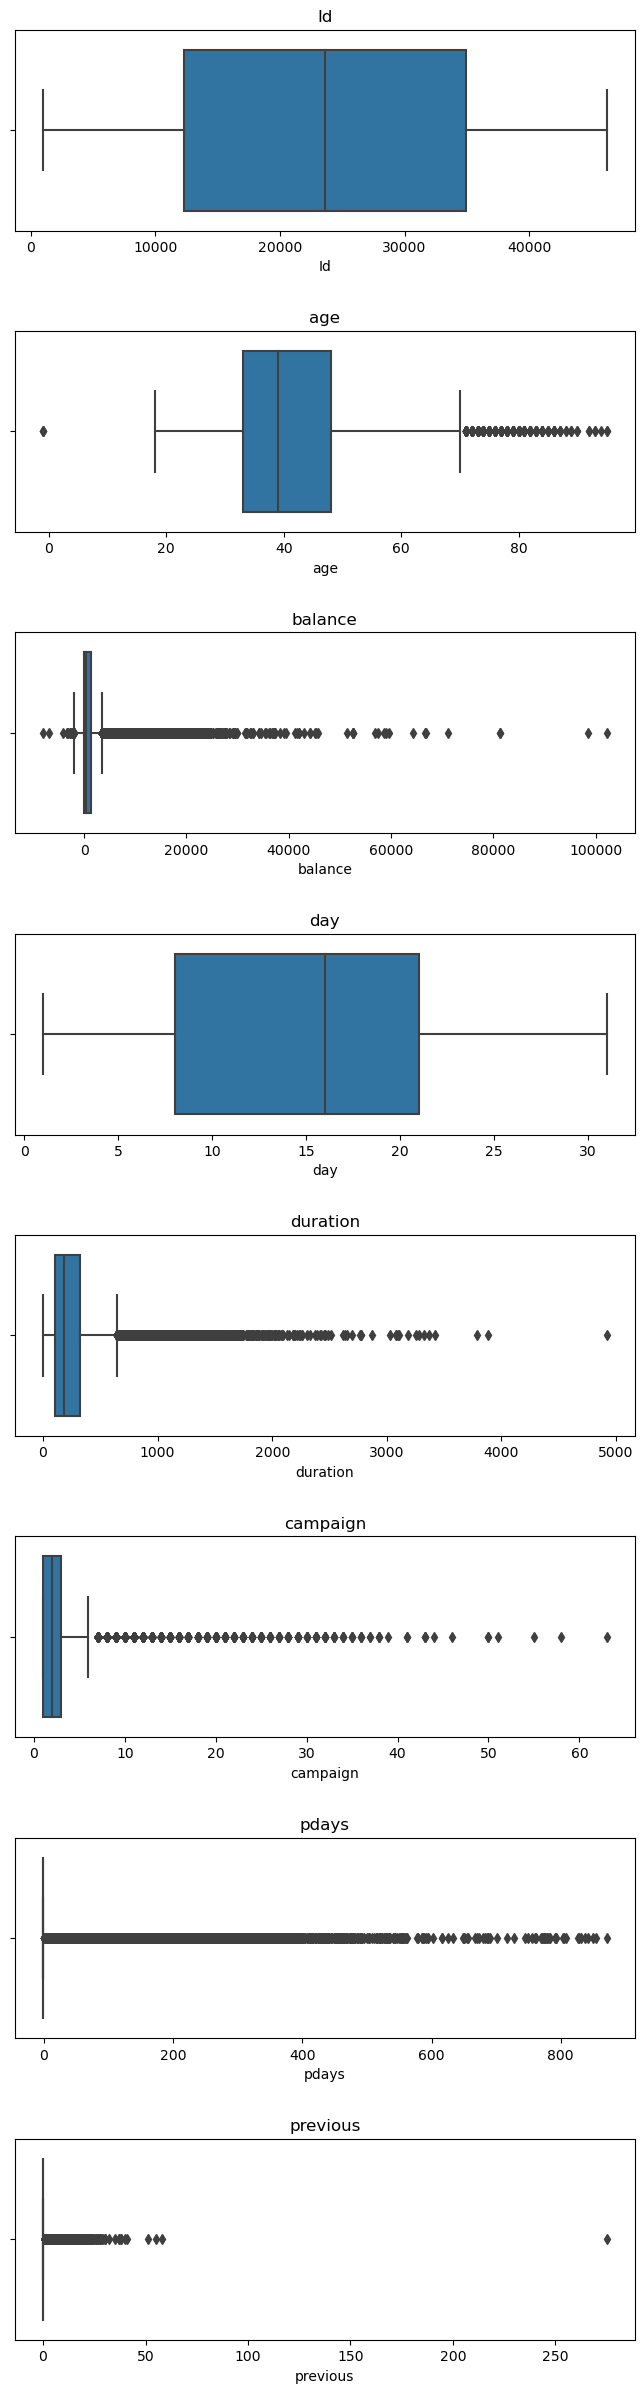

In [12]:
cols_num = ['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i]) # "boxplot" can allow us to see the outliers points
    ax[i].set_title(col)

**Observations:**

- 'previous': we have one extreme value in our dataset (close to 300).
- 'age': we are only considering people older than 18 years old.

In [13]:
print(f'Size of the dataset before eliminate the rows of previous: {data.shape}')
data = data[data['previous']<=100]
data = data[data['age']>=18] 
print(f'Size of the dataset after eliminate the rows of previous: {data.shape}')

Size of the dataset before eliminate the rows of previous: (45197, 18)
Size of the dataset after eliminate the rows of previous: (45193, 18)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45193 non-null  int64  
 1   age        45193 non-null  float64
 2   job        45193 non-null  object 
 3   marital    45193 non-null  object 
 4   education  45193 non-null  object 
 5   default    45193 non-null  object 
 6   balance    45193 non-null  float64
 7   housing    45193 non-null  object 
 8   loan       45193 non-null  object 
 9   contact    45193 non-null  object 
 10  day        45193 non-null  int64  
 11  month      45193 non-null  object 
 12  duration   45193 non-null  int64  
 13  campaign   45193 non-null  int64  
 14  pdays      45193 non-null  int64  
 15  previous   45193 non-null  int64  
 16  poutcome   45193 non-null  object 
 17  y          45193 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


**Checking for typos of the categorical variables**


Let's check if we have typos in our categorical columns.

In [15]:
encoder = LabelEncoder()

data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['contact'] = encoder.fit_transform(data['contact'])
data['month'] = encoder.fit_transform(data['month'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data['y'] = encoder.fit_transform(data['y'])
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,1004,47.0,1,1,3,0,1506.0,1,0,2,5,8,92,1,-1,0,3,0
4,1005,33.0,11,2,3,0,1.0,0,0,2,5,8,198,1,-1,0,3,0
5,1006,35.0,4,1,2,0,231.0,1,0,2,5,8,139,1,-1,0,3,0
6,1007,28.0,4,2,2,0,447.0,1,1,2,5,8,217,1,-1,0,3,0
10,1011,41.0,0,0,1,0,270.0,1,0,2,5,8,222,1,-1,0,3,0


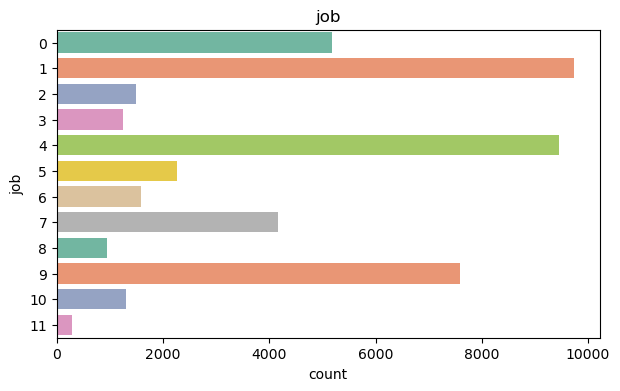

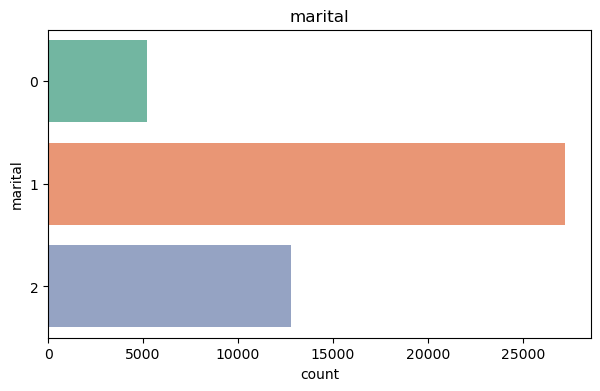

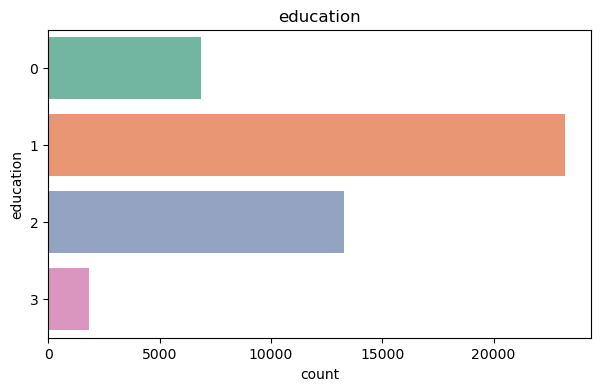

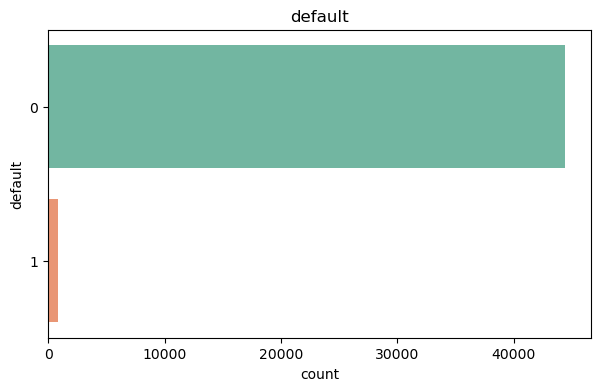

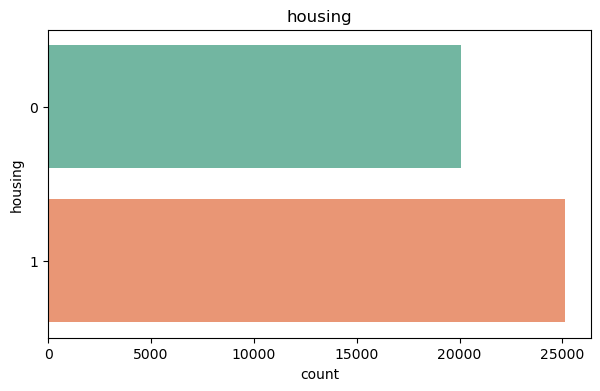

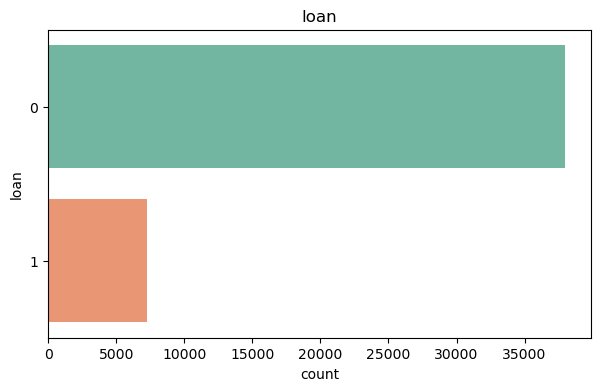

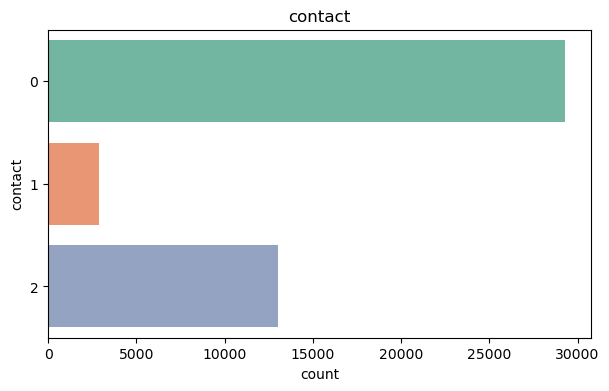

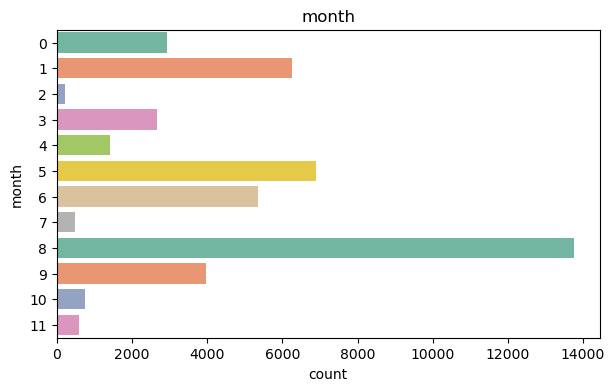

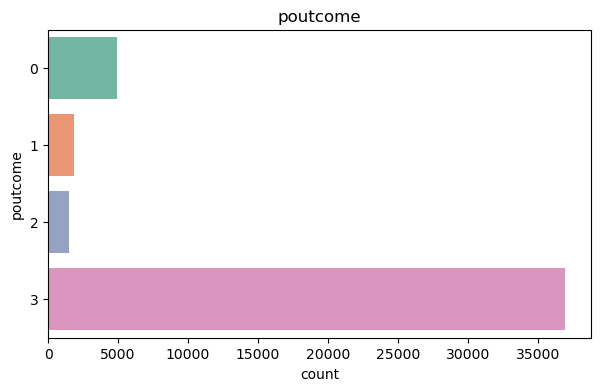

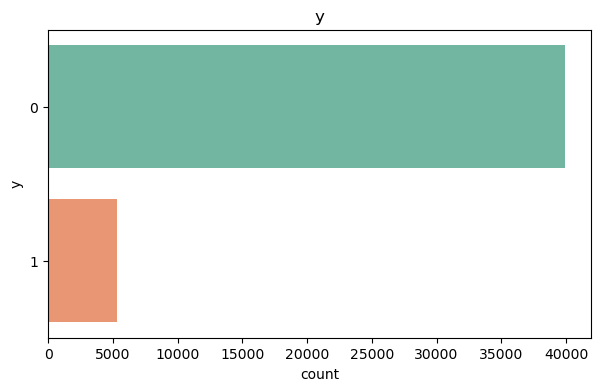

In [16]:
col_of_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for i in col_of_data:
    plt.figure(figsize=(7,4))
    plt.title(i)
    sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)

We don't have any typos in our categorical columns!

In [17]:
data.shape

(45193, 18)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45193 non-null  int64  
 1   age        45193 non-null  float64
 2   job        45193 non-null  int32  
 3   marital    45193 non-null  int32  
 4   education  45193 non-null  int32  
 5   default    45193 non-null  int32  
 6   balance    45193 non-null  float64
 7   housing    45193 non-null  int32  
 8   loan       45193 non-null  int32  
 9   contact    45193 non-null  int32  
 10  day        45193 non-null  int64  
 11  month      45193 non-null  int32  
 12  duration   45193 non-null  int64  
 13  campaign   45193 non-null  int64  
 14  pdays      45193 non-null  int64  
 15  previous   45193 non-null  int64  
 16  poutcome   45193 non-null  int32  
 17  y          45193 non-null  int32  
dtypes: float64(2), int32(10), int64(6)
memory usage: 4.8 MB


We conclued that the dataset has been cleaned up and ready to be explored in our project.

In [19]:
path_clean_dataset = 'data_clean.csv'
data.to_csv(path_clean_dataset, index=False)

### Model Training

First, since the dataset is not balanced, we need to over sample it to make sure there are the same number of "yes" and "no" responses to the marketing campaign so that the results obtained are valid.


In [25]:
data = pd.read_csv(path_clean_dataset)

features = data.drop('y', axis=1)
labels = data['y']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=30)

# Smaller test set
Xs_train, Xs_test, ys_train, ys_test = train_test_split(features, labels, test_size=0.1, random_state=30)
# Bigger test set
Xb_train, Xb_test, yb_train, yb_test = train_test_split(features, labels, test_size=0.3, random_state=30)

smote = SMOTE(random_state=30)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=30)
Xs_train_resampled, ys_train_resampled = smote.fit_resample(Xs_train, ys_train)

smote = SMOTE(random_state=30)
Xb_train_resampled, yb_train_resampled = smote.fit_resample(Xb_train, yb_train)

# Check the distribution in the resampled training set (=0.2)
print("Training set distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Check the distribution in the testing set
print("\nTesting set distribution:")
print(y_test.value_counts(normalize=True))



Training set distribution after SMOTE:
y
0    0.5
1    0.5
Name: proportion, dtype: float64

Testing set distribution:
y
0    0.881403
1    0.118597
Name: proportion, dtype: float64


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models

#We will use KNN to compare test sizes
model_knn = KNeighborsClassifier()
model_knnS = KNeighborsClassifier()
model_knnB = KNeighborsClassifier()

model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(random_state=30)
model_lr = LogisticRegression(random_state=30, max_iter=10000)
model_nn = MLPClassifier(activation='relu', solver='adam', random_state=30)

model_rf = RandomForestClassifier(random_state=30)
model_gb = GradientBoostingClassifier(random_state=30)


print("don1e")



don1e


In [31]:
# Train Algos

#We will train knn with the 3 different test sizes to show which is the best but we have made sure to check for other algorithms also


model_knn.fit(X_train_resampled, y_train_resampled)
model_knnS.fit(Xs_train_resampled, ys_train_resampled)
model_knnB.fit(Xb_train_resampled, yb_train_resampled)

print("done1")

model_nb.fit(X_train_resampled, y_train_resampled)

print("done2")

model_dt.fit(X_train_resampled, y_train_resampled)

print("done3")

model_lr.fit(X_train_resampled, y_train_resampled)

print("done4")

model_nn.fit(X_train_resampled, y_train_resampled)

print("done5")

model_rf.fit(X_train_resampled, y_train_resampled)

print("done6")

model_gb.fit(X_train_resampled, y_train_resampled)

print("done7")




done1
done2
done3
done4
done5
done6
done7


In [32]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(model_knn, X_test, y_test)
accuracy_knnS, precision_knnS, recall_knnS, f1_knnS = evaluate_model(model_knnS, Xs_test, ys_test)
accuracy_knnB, precision_knnB, recall_knnB, f1_knnB = evaluate_model(model_knnB, Xb_test, yb_test)

accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(model_nb, X_test, y_test)

accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(model_dt, X_test, y_test)

accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(model_lr, X_test, y_test)

accuracy_nn, precision_nn, recall_nn, f1_nn = evaluate_model(model_nn, X_test, y_test)

accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(model_rf, X_test, y_test)

accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(model_gb, X_test, y_test)



# Display evaluation results for each model
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-score: {f1_knn:.4f}")

print("K-Nearest Neighbors (KNN) Performance (Smaller than Optimal Test size):")
print(f"Accuracy: {accuracy_knnS:.4f}, Precision: {precision_knnS:.4f}, Recall: {recall_knnS:.4f}, F1-score: {f1_knnS:.4f}")

# Display evaluation results for each model
print("K-Nearest Neighbors (KNN) Performance (Bigger than Optimal Test size):")
print(f"Accuracy: {accuracy_knnB:.4f}, Precision: {precision_knnB:.4f}, Recall: {recall_knnB:.4f}, F1-score: {f1_knnB:.4f}")

#Rest of the algos are done with optimal test size (=0.2)

print("\nNaive Bayes (GaussianNB) Performance:")
print(f"Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-score: {f1_nb:.4f}")

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1-score: {f1_nn:.4f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")



print("\nGradient Boost Performance:")
print(f"Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1-score: {f1_gb:.4f}")






K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.8575, Precision: 0.4427, Recall: 0.7780, F1-score: 0.5643
K-Nearest Neighbors (KNN) Performance (Smaller than Optimal Test size):
Accuracy: 0.8538, Precision: 0.4265, Recall: 0.7793, F1-score: 0.5513
K-Nearest Neighbors (KNN) Performance (Bigger than Optimal Test size):
Accuracy: 0.8567, Precision: 0.4395, Recall: 0.7764, F1-score: 0.5613

Naive Bayes (GaussianNB) Performance:
Accuracy: 0.7208, Precision: 0.2785, Recall: 0.8517, F1-score: 0.4198

Decision Tree Performance:
Accuracy: 0.8735, Precision: 0.4748, Recall: 0.6250, F1-score: 0.5397

Logistic Regression Performance:
Accuracy: 0.8367, Precision: 0.3969, Recall: 0.7257, F1-score: 0.5132

Neural Network Performance:
Accuracy: 0.8848, Precision: 0.5838, Recall: 0.1007, F1-score: 0.1718

Random Forest Performance:
Accuracy: 0.9001, Precision: 0.5620, Recall: 0.7146, F1-score: 0.6292

Gradient Boost Performance:
Accuracy: 0.8791, Precision: 0.4941, Recall: 0.8172, F1-score: 0.6158


**Decision Tree** (nao vou mexer no que está aqui prabaixo dani

)


train accuracy: 1.0
test accuracy: 0.8857174466202014
precision score: 0.5185891325071497
recall score: 0.5074626865671642
f1 score: 0.5129655822725129
cross validation score: 0.8848260132482455
tree depth: 28
tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


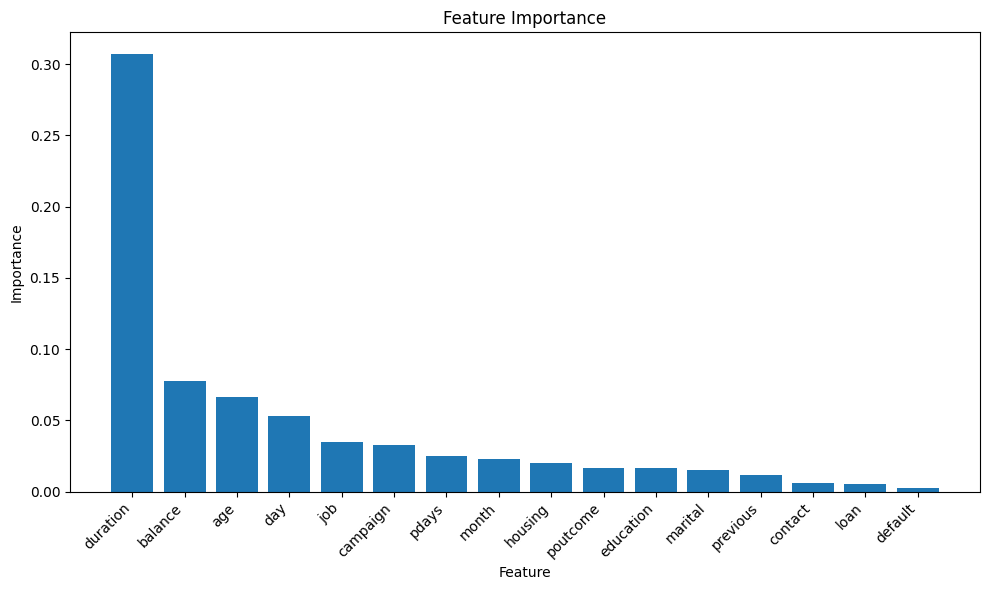

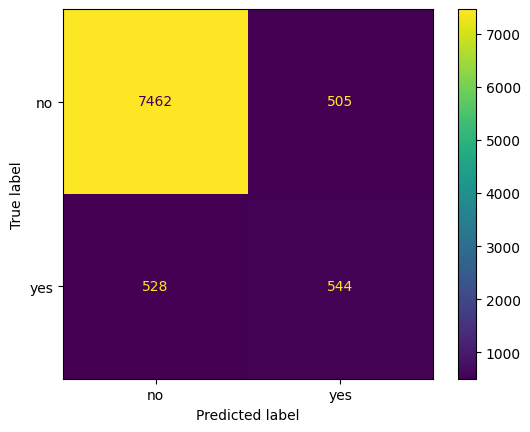

In [172]:
imp = tree.feature_importances_
features_names = tree.feature_names_in_
sorted_indices = np.argsort(imp)[::-1] 
sorted_imp = imp[sorted_indices]
sorted_features_names = [features_names[i] for i in sorted_indices]

id_index = sorted_features_names.index('Id')
del sorted_features_names[id_index]
sorted_imp = np.delete(sorted_imp, id_index)

plt.figure(figsize=(10, 6))
plt.bar(sorted_features_names, sorted_imp)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

y_pred = tree.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()